# Set Up
Import libraries and read the code

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the data
df = pd.read_csv('data/ecommerce_consumer_behavior_data.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Preprocessing: Keep only the features used in the analysis
features_to_keep = [
    'Customer_ID',
    'Age',
    'Gender',
    'Income_Level',
    'Education_Level',
    'Purchase_Category',
    'Purchase_Amount',
    'Frequency_of_Purchase',
    'Brand_Loyalty',
    'Product_Rating',
    'Social_Media_Influence',
    'Return_Rate',
    'Customer_Satisfaction'
]

df = df[features_to_keep].dropna()

print(f"\nAfter preprocessing - shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

df.head()

Dataset shape: (1000, 28)

Columns: ['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Location', 'Purchase_Category', 'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel', 'Brand_Loyalty', 'Product_Rating', 'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence', 'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction', 'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method', 'Time_of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member', 'Purchase_Intent', 'Shipping_Preference', 'Time_to_Decision']

After preprocessing - shape: (753, 13)
Columns: ['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Education_Level', 'Purchase_Category', 'Purchase_Amount', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating', 'Social_Media_Influence', 'Return_Rate', 'Customer_Satisfaction']


,Customer_ID,Age,Gender,Income_Level,Education_Level,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Social_Media_Influence,Return_Rate,Customer_Satisfaction
1,29-392-9296,49,Male,High,High School,Food & Beverages,$222.22,11,3,1,Medium,1,5
2,84-649-5117,24,Female,Middle,Master's,Office Supplies,$426.22,2,5,5,Low,1,7
3,48-980-6078,29,Female,Middle,Master's,Home Appliances,$101.31,6,3,1,High,0,1
4,91-170-9072,33,Female,Middle,High School,Furniture,$211.70,6,3,4,Medium,2,10
5,82-561-4233,45,Male,Middle,Master's,Office Supplies,$487.95,8,3,3,High,2,3


# Figure 1: Average Purchase Amount by Income Level and Purchase Category
Average Purchase Amount by Income Level and Purchase Category

In [77]:
# Clean Purchase_Amount column (remove '$' and spaces, convert to float)
df['Purchase_Amount_Clean'] = df['Purchase_Amount'].str.replace('$', '').str.strip().astype(float)

# Check unique values for Income_Level and Purchase_Category
print("Income Levels:", df['Income_Level'].unique())
print("\nPurchase Categories:", df['Purchase_Category'].unique())

Income Levels: ['High' 'Middle']

Purchase Categories: ['Food & Beverages' 'Office Supplies' 'Home Appliances' 'Furniture'
 'Books' 'Mobile Accessories' 'Sports & Outdoors' 'Luxury Goods'
 'Animal Feed' 'Hotels' 'Packages)' 'Baby Products' 'Toys & Games'
 'Software & Apps' 'Arts & Crafts' 'Electronics' 'Health Supplements'
 'Health Care' 'Clothing' 'Beauty & Personal Care'
 'Travel & Leisure (Flights' 'Groceries' 'Jewelry & Accessories'
 'Gardening & Outdoors']


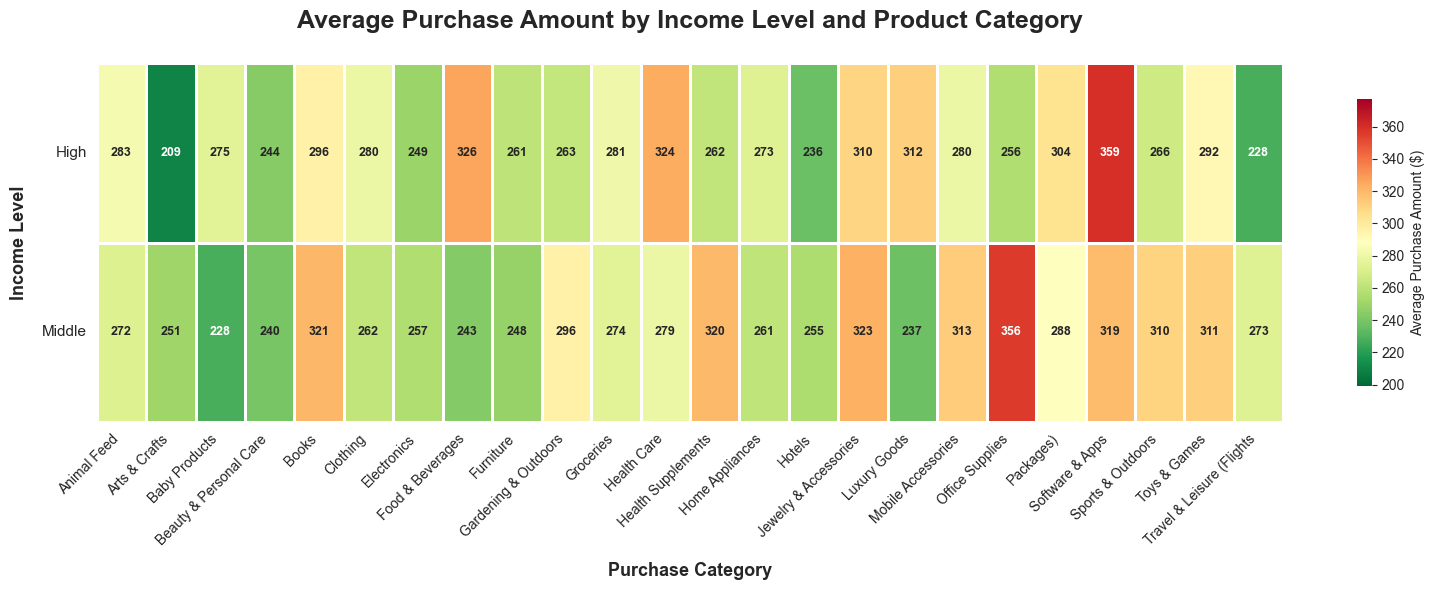


=== Summary Statistics ===

Overall average purchase amount: $279.27

Highest spending combination:
  High income × Software & Apps: $359.38

Lowest spending combination:
  High income × Arts & Crafts: $209.40


In [78]:
# Multi-Dimensional Spending Analysis: Heatmap
# Create pivot table: Average Purchase Amount by Income Level and Purchase Category

pivot_table = df.pivot_table(
    values='Purchase_Amount_Clean',
    index='Income_Level',
    columns='Purchase_Category',
    aggfunc='mean'
)

# Create the heatmap with improved styling
plt.figure(figsize=(16, 6))

# Use a more professional color palette
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='RdYlGn_r',
    cbar_kws={'label': 'Average Purchase Amount ($)', 'shrink': 0.8},
    linewidths=1,
    linecolor='white',
    vmin=pivot_table.values.min() * 0.95,
    vmax=pivot_table.values.max() * 1.05,
    annot_kws={'size': 9, 'weight': 'bold'}
)

plt.title('Average Purchase Amount by Income Level and Product Category', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Purchase Category', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Income Level', fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=11)

# Add a subtle background
ax = plt.gca()
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('viz/Fig1-Purchase Amount by Income and Category.png', dpi=300, bbox_inches='tight')
plt.show()

# Display summary statistics
print("\n=== Summary Statistics ===")
print(f"\nOverall average purchase amount: ${pivot_table.values.mean():.2f}")
print(f"\nHighest spending combination:")
max_idx = np.unravel_index(pivot_table.values.argmax(), pivot_table.shape)
print(f"  {pivot_table.index[max_idx[0]]} income × {pivot_table.columns[max_idx[1]]}: ${pivot_table.values[max_idx]:.2f}")
print(f"\nLowest spending combination:")
min_idx = np.unravel_index(pivot_table.values.argmin(), pivot_table.shape)
print(f"  {pivot_table.index[min_idx[0]]} income × {pivot_table.columns[min_idx[1]]}: ${pivot_table.values[min_idx]:.2f}")

# Figure 2: The Digital Influence Spectrum
Average Purchase Amount by Social Media Influence and Age Group

In [79]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 25, 35, 50, 100], 
                         labels=['18-25', '26-35', '36-50', '50+'])

# Check the data
print("Age Groups:", df['Age_Group'].value_counts().sort_index())
print("\nSocial Media Influence levels:", df['Social_Media_Influence'].value_counts())

# Create pivot table for grouped bar chart
influence_age_pivot = df.groupby(['Social_Media_Influence', 'Age_Group'])['Purchase_Amount_Clean'].mean().reset_index()

print("\nPivot table preview:")
print(influence_age_pivot.head(10))

Age Groups: Age_Group
18-25    166
26-35    241
36-50    346
50+        0
Name: count, dtype: int64

Social Media Influence levels: Social_Media_Influence
High      268
Low       249
Medium    236
Name: count, dtype: int64

Pivot table preview:
  Social_Media_Influence Age_Group  Purchase_Amount_Clean
0                   High     18-25             290.348039
1                   High     26-35             285.025054
2                   High     36-50             281.272903
3                   High       50+                    NaN
4                    Low     18-25             284.053088
5                    Low     26-35             278.459855
6                    Low     36-50             261.812321
7                    Low       50+                    NaN
8                 Medium     18-25             299.265957
9                 Medium     26-35             271.076835


/var/folders/v7/y3nqtm0172765ff3b0s1q_9m0000gn/T/ipykernel_49454/847257004.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



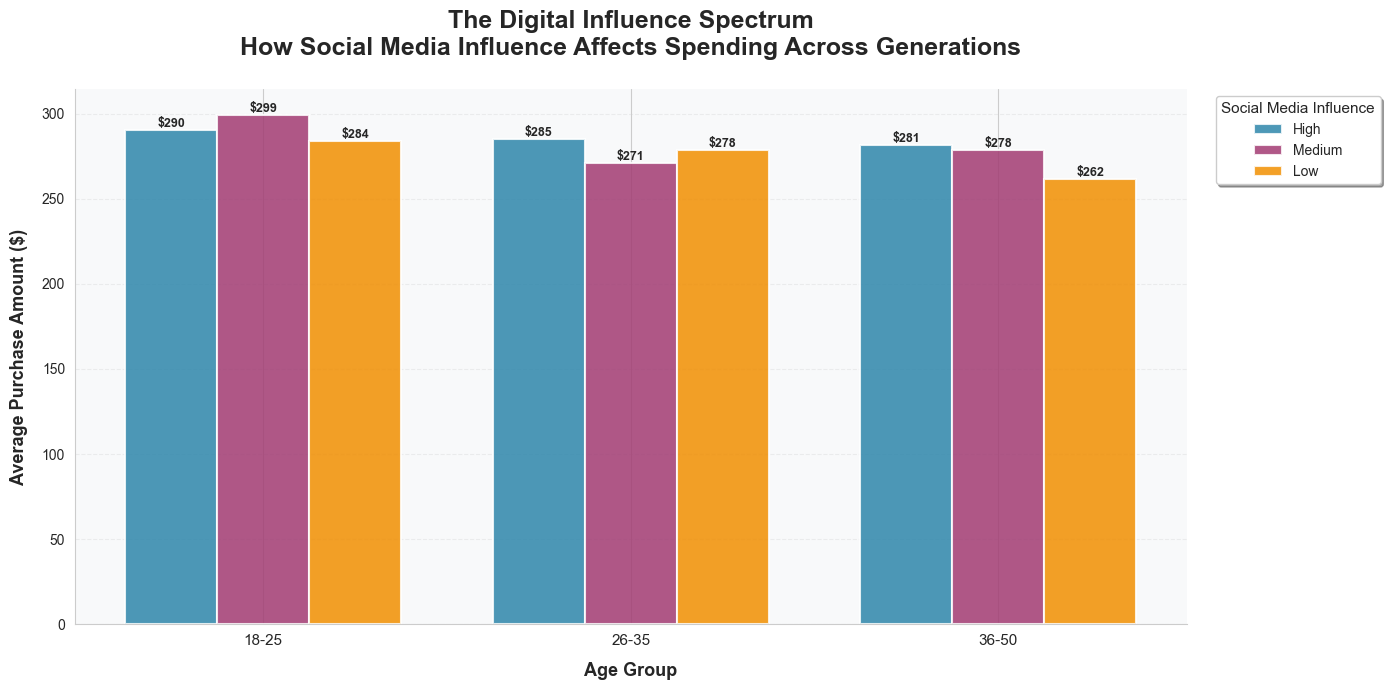


=== Key Insights ===

18-25 age group:
  High: $290.35
  Low: $284.05
  Medium: $299.27

26-35 age group:
  High: $285.03
  Low: $278.46
  Medium: $271.08

36-50 age group:
  High: $281.27
  Low: $261.81
  Medium: $278.43


In [80]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Define age groups and social media influence levels
age_groups = ['18-25', '26-35', '36-50']
influence_levels = ['High', 'Medium', 'Low']

# Set up bar positions
x = np.arange(len(age_groups))
width = 0.25
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Create bars for each influence level
for i, influence in enumerate(influence_levels):
    data = influence_age_pivot[influence_age_pivot['Social_Media_Influence'] == influence]
    values = [data[data['Age_Group'] == age]['Purchase_Amount_Clean'].values[0] 
              if len(data[data['Age_Group'] == age]) > 0 else 0 
              for age in age_groups]
    
    bars = ax.bar(x + (i - 1) * width, values, width, 
                   label=influence, color=colors[i], 
                   alpha=0.85, edgecolor='white', linewidth=1.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize the plot
ax.set_xlabel('Age Group', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('Average Purchase Amount ($)', fontsize=13, fontweight='bold', labelpad=10)
ax.set_title('The Digital Influence Spectrum\nHow Social Media Influence Affects Spending Across Generations', 
             fontsize=18, fontweight='bold', pad=25)
ax.set_xticks(x)
ax.set_xticklabels(age_groups, fontsize=11)
ax.legend(title='Social Media Influence', title_fontsize=11, fontsize=10,
          bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True, shadow=True, fancybox=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_facecolor('#f8f9fa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('viz/Fig2-Social Media Influence by Age.png', dpi=300, bbox_inches='tight')
plt.show()

# Print insights
print("\n=== Key Insights ===")
for age in age_groups:
    age_data = influence_age_pivot[influence_age_pivot['Age_Group'] == age]
    print(f"\n{age} age group:")
    for _, row in age_data.iterrows():
        print(f"  {row['Social_Media_Influence']}: ${row['Purchase_Amount_Clean']:.2f}")

# Figure 3: Return Risk Profile
Identifying Problem Categories by Return Rate, Purchase Amount, Volume, and Rating

In [81]:
# Prepare data for bubble chart
category_stats = df.groupby('Purchase_Category').agg({
    'Purchase_Amount_Clean': 'mean',  # X-axis
    'Return_Rate': 'mean',  # Y-axis
    'Customer_ID': 'count',  # Bubble size (volume)
    'Product_Rating': 'mean'  # Color
}).reset_index()

category_stats.columns = ['Category', 'Avg_Purchase_Amount', 'Avg_Return_Rate', 'Volume', 'Avg_Rating']

print("Category Statistics:")
print(category_stats.head(10))
print(f"\nTotal categories: {len(category_stats)}")

Category Statistics:
                 Category  Avg_Purchase_Amount  Avg_Return_Rate  Volume  \
0             Animal Feed           276.757500         0.892857      28   
1           Arts & Crafts           224.101786         0.892857      28   
2           Baby Products           260.508788         1.030303      33   
3  Beauty & Personal Care           242.270000         0.807692      26   
4                   Books           306.461379         1.068966      29   
5                Clothing           269.487692         0.923077      26   
6             Electronics           252.386585         0.902439      41   
7        Food & Beverages           291.046364         0.757576      33   
8               Furniture           253.594412         0.911765      34   
9    Gardening & Outdoors           278.375313         1.125000      32   

   Avg_Rating  
0    2.714286  
1    2.678571  
2    3.424242  
3    3.153846  
4    2.931034  
5    2.846154  
6    2.975610  
7    2.909091  
8    3.17

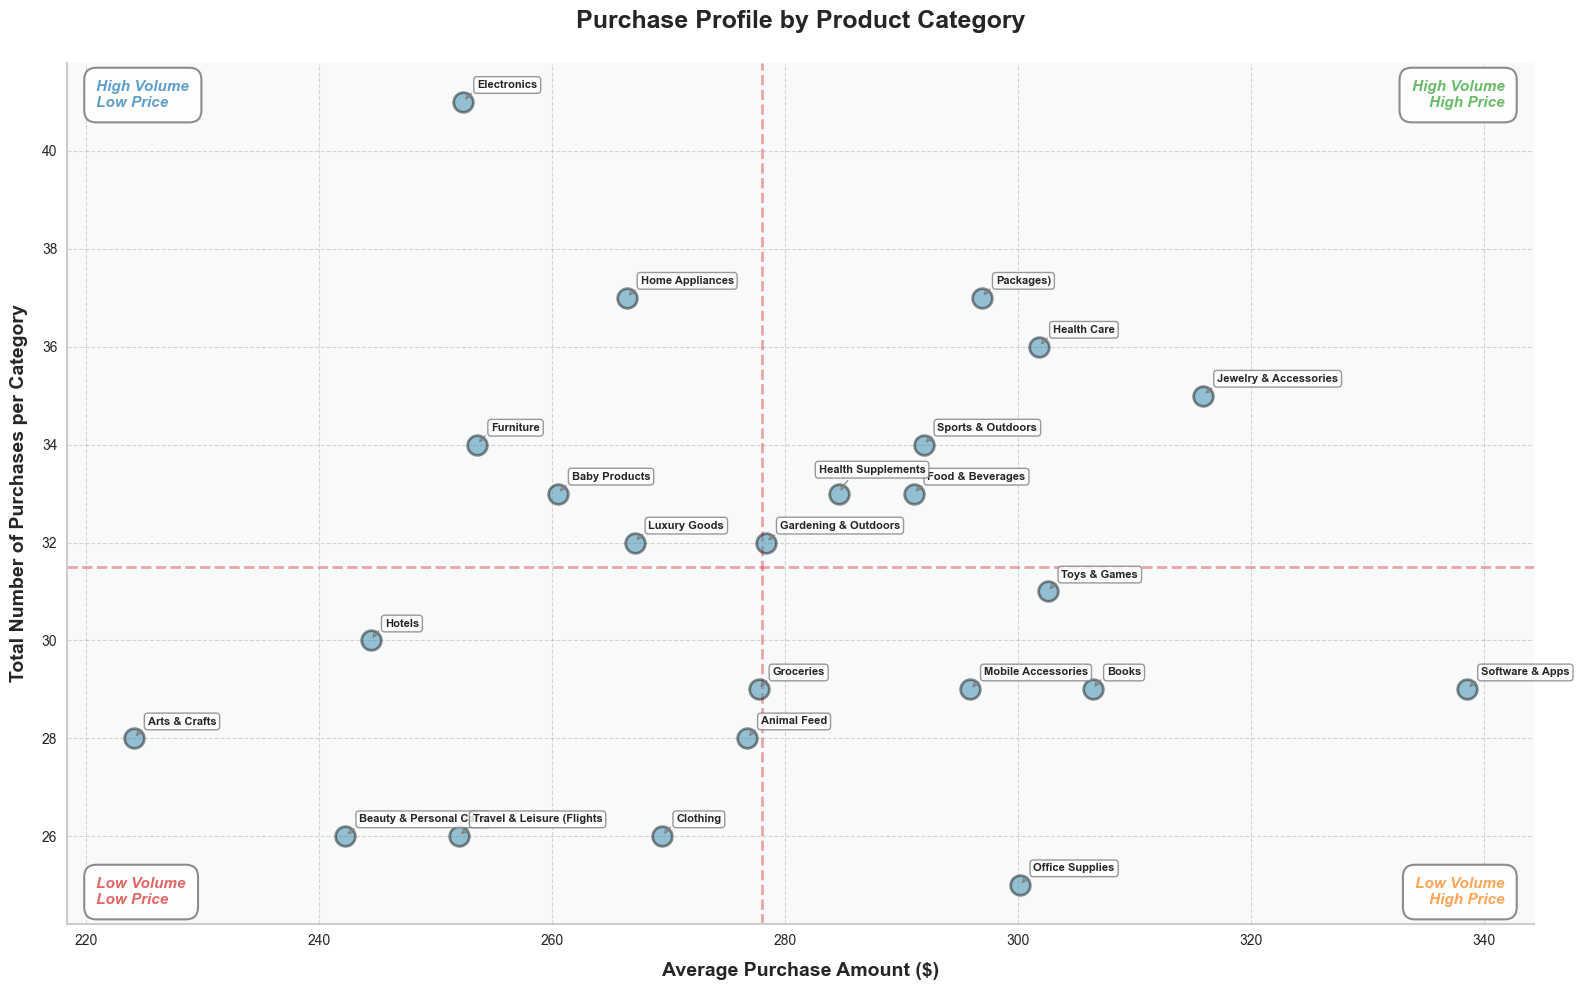


=== Category Analysis ===

High Volume + High Price Categories:
  Packages): 37 purchases, $296.92 avg price, 0.9% return rate
  Health Care: 36 purchases, $301.83 avg price, 0.8% return rate
  Jewelry & Accessories: 35 purchases, $315.92 avg price, 1.1% return rate
  Sports & Outdoors: 34 purchases, $291.91 avg price, 0.9% return rate
  Food & Beverages: 33 purchases, $291.05 avg price, 0.8% return rate
  Health Supplements: 33 purchases, $284.69 avg price, 0.9% return rate
  Gardening & Outdoors: 32 purchases, $278.38 avg price, 1.1% return rate

Overall metrics:
  Average return rate: 0.94%
  Average product rating: 3.02
  Average purchase amount: $278.80
  Average volume per category: 31 purchases


In [82]:
# Create bubble chart
fig, ax = plt.subplots(figsize=(16, 10))

# Use consistent bubble size since volume is on y-axis
bubble_size = 200

# Create scatter plot with consistent bubble sizes
scatter = ax.scatter(
    category_stats['Avg_Purchase_Amount'],
    category_stats['Volume'],
    s=bubble_size,  # Consistent size for all bubbles
    color='#2E86AB',
    alpha=0.5,
    edgecolors='#1a1a1a',
    linewidth=2
)

# Add category labels outside bubbles with connecting lines
for idx, row in category_stats.iterrows():
    # Adjust offset for specific overlapping labels
    if row['Category'] == 'Health Supplements':
        offset_x, offset_y = -15, 15
    else:
        offset_x, offset_y = 10, 10
    
    ax.annotate(
        row['Category'],
        xy=(row['Avg_Purchase_Amount'], row['Volume']),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        fontsize=8,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='gray', lw=0.8)
    )

# Customize plot
ax.set_xlabel('Average Purchase Amount ($)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Total Number of Purchases per Category', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Purchase Profile by Product Category', 
             fontsize=18, fontweight='bold', pad=25)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
ax.set_facecolor('#f8f9fa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add reference lines for quadrant analysis
avg_amount = category_stats['Avg_Purchase_Amount'].median()
avg_volume = category_stats['Volume'].median()
ax.axvline(avg_amount, color='#d62728', linestyle='--', alpha=0.4, linewidth=2, zorder=0)
ax.axhline(avg_volume, color='#d62728', linestyle='--', alpha=0.4, linewidth=2, zorder=0)

# Add quadrant labels on the edges
quadrant_style = dict(fontsize=11, weight='bold', alpha=0.7, style='italic',
                      bbox=dict(boxstyle='round,pad=0.8', facecolor='white', 
                               edgecolor='gray', alpha=0.9, linewidth=1.5))

# Top right - High volume, high price
ax.text(0.98, 0.98, 'High Volume\nHigh Price', 
        transform=ax.transAxes, color='#2ca02c', va='top', ha='right', **quadrant_style)

# Top left - High volume, low price
ax.text(0.02, 0.98, 'High Volume\nLow Price', 
        transform=ax.transAxes, color='#1f77b4', va='top', ha='left', **quadrant_style)

# Bottom right - Low volume, high price
ax.text(0.98, 0.02, 'Low Volume\nHigh Price', 
        transform=ax.transAxes, color='#ff7f0e', va='bottom', ha='right', **quadrant_style)

# Bottom left - Low volume, low price
ax.text(0.02, 0.02, 'Low Volume\nLow Price', 
        transform=ax.transAxes, color='#d62728', va='bottom', ha='left', **quadrant_style)

plt.tight_layout()
plt.savefig('viz/Fig3-Purchase Profile by Category.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify problem categories (high return rate, low rating)
print("\n=== Category Analysis ===")
high_volume_high_price = category_stats[
    (category_stats['Volume'] > category_stats['Volume'].median()) &
    (category_stats['Avg_Purchase_Amount'] > category_stats['Avg_Purchase_Amount'].median())
].sort_values('Volume', ascending=False)

print("\nHigh Volume + High Price Categories:")
for _, row in high_volume_high_price.iterrows():
    print(f"  {row['Category']}: {row['Volume']} purchases, ${row['Avg_Purchase_Amount']:.2f} avg price, {row['Avg_Return_Rate']:.1f}% return rate")

print(f"\nOverall metrics:")
print(f"  Average return rate: {category_stats['Avg_Return_Rate'].mean():.2f}%")
print(f"  Average product rating: {category_stats['Avg_Rating'].mean():.2f}")
print(f"  Average purchase amount: ${category_stats['Avg_Purchase_Amount'].mean():.2f}")
print(f"  Average volume per category: {category_stats['Volume'].mean():.0f} purchases")

# Figure 4: Gender and Income Level Distribution
Analyzing the relationship between gender and income level with statistical tests.

In [83]:
# Analyze gender and income level distribution
print("Gender distribution:")
print(df['Gender'].value_counts())
print("\nIncome Level distribution:")
print(df['Income_Level'].value_counts())

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Income_Level'])
print("\nContingency Table (Gender vs Income Level):")
print(contingency_table)

# Create percentage table
percentage_table = pd.crosstab(df['Gender'], df['Income_Level'], normalize='index') * 100
print("\nPercentage Distribution by Gender:")
print(percentage_table.round(2))

Gender distribution:
Gender
Male           348
Female         332
Genderfluid     14
Bigender        14
Agender         14
Non-binary      13
Polygender      10
Genderqueer      8
Name: count, dtype: int64

Income Level distribution:
Income_Level
High      393
Middle    360
Name: count, dtype: int64

Contingency Table (Gender vs Income Level):
Income_Level  High  Middle
Gender                    
Agender          9       5
Bigender         9       5
Female         180     152
Genderfluid      8       6
Genderqueer      7       1
Male           168     180
Non-binary       7       6
Polygender       5       5

Percentage Distribution by Gender:
Income_Level   High  Middle
Gender                     
Agender       64.29   35.71
Bigender      64.29   35.71
Female        54.22   45.78
Genderfluid   57.14   42.86
Genderqueer   87.50   12.50
Male          48.28   51.72
Non-binary    53.85   46.15
Polygender    50.00   50.00


In [84]:
# Perform Chi-Square test for independence
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("=== Chi-Square Test for Independence ===")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"\nSignificance Level: α = 0.05")

if p_value < 0.05:
    print("Result: There IS a statistically significant relationship between Gender and Income Level")
    print("(We reject the null hypothesis)")
else:
    print("Result: There is NO statistically significant relationship between Gender and Income Level")
    print("(We fail to reject the null hypothesis)")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected_freq, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

=== Chi-Square Test for Independence ===
Chi-Square Statistic: 8.4937
P-value: 0.2911
Degrees of Freedom: 7

Significance Level: α = 0.05
Result: There is NO statistically significant relationship between Gender and Income Level
(We fail to reject the null hypothesis)

Expected Frequencies:
Income_Level    High  Middle
Gender                      
Agender         7.31    6.69
Bigender        7.31    6.69
Female        173.27  158.73
Genderfluid     7.31    6.69
Genderqueer     4.18    3.82
Male          181.63  166.37
Non-binary      6.78    6.22
Polygender      5.22    4.78


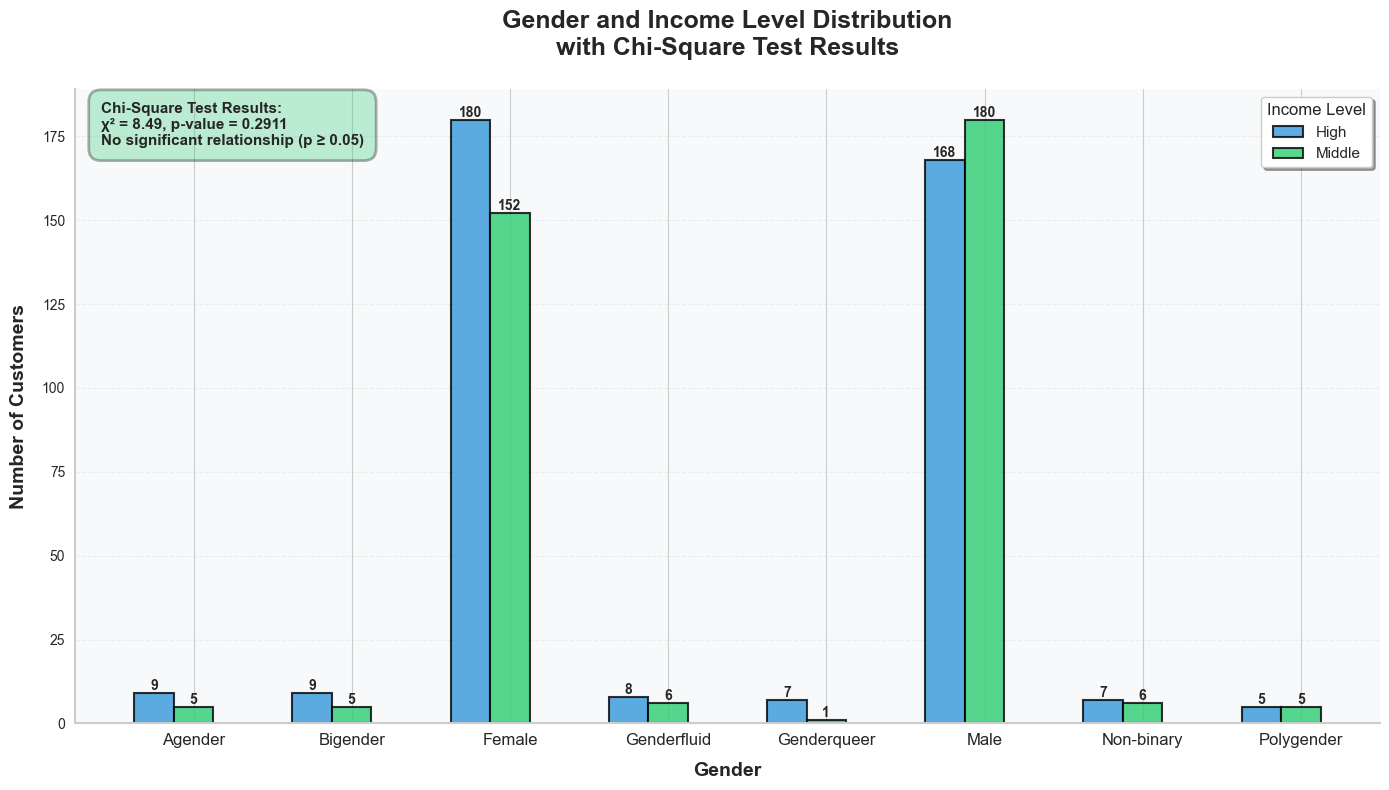


=== Summary Insights ===

Agender:
  High: 9 customers (64.3%)
  Middle: 5 customers (35.7%)

Bigender:
  High: 9 customers (64.3%)
  Middle: 5 customers (35.7%)

Female:
  High: 180 customers (54.2%)
  Middle: 152 customers (45.8%)

Genderfluid:
  High: 8 customers (57.1%)
  Middle: 6 customers (42.9%)

Genderqueer:
  High: 7 customers (87.5%)
  Middle: 1 customers (12.5%)

Male:
  High: 168 customers (48.3%)
  Middle: 180 customers (51.7%)

Non-binary:
  High: 7 customers (53.8%)
  Middle: 6 customers (46.2%)

Polygender:
  High: 5 customers (50.0%)
  Middle: 5 customers (50.0%)


In [85]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for plotting
x = np.arange(len(contingency_table.index))
width = 0.25
income_levels = contingency_table.columns.tolist()
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Create bars for each income level
for i, income in enumerate(income_levels):
    values = contingency_table[income].values
    bars = ax.bar(x + (i - 1) * width, values, width, 
                   label=income, color=colors[i], 
                   alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
ax.set_xlabel('Gender', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Number of Customers', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Gender and Income Level Distribution\nwith Chi-Square Test Results', 
             fontsize=18, fontweight='bold', pad=25)
ax.set_xticks(x)
ax.set_xticklabels(contingency_table.index, fontsize=12)
ax.legend(title='Income Level', title_fontsize=12, fontsize=11, 
          loc='upper right', frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_facecolor('#f8f9fa')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add statistical annotation
stats_text = f"Chi-Square Test Results:\n"
stats_text += f"χ² = {chi2:.2f}, p-value = {p_value:.4f}\n"
if p_value < 0.05:
    stats_text += "Significant relationship (p < 0.05)"
    box_color = '#e74c3c'
else:
    stats_text += "No significant relationship (p ≥ 0.05)"
    box_color = '#2ecc71'

ax.text(0.02, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor=box_color, 
                 edgecolor='black', alpha=0.3, linewidth=2),
        fontweight='bold')

plt.tight_layout()
plt.savefig('viz/Fig4-Gender and Income Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary insights
print("\n=== Summary Insights ===")
for gender in contingency_table.index:
    total = contingency_table.loc[gender].sum()
    print(f"\n{gender}:")
    for income in income_levels:
        count = contingency_table.loc[gender, income]
        pct = (count / total) * 100
        print(f"  {income}: {count} customers ({pct:.1f}%)")

# Figure 5: Income-Demographics Spending Heatmap
Average Purchase Amount across Income Level and Education Level

In [86]:
# Check unique values
print("Income Levels:", df['Income_Level'].unique())
print("\nEducation Levels:", df['Education_Level'].unique())

# Create pivot table for heatmap
income_education_pivot = df.pivot_table(
    values='Purchase_Amount_Clean',
    index='Income_Level',
    columns='Education_Level',
    aggfunc='mean'
)

print("\nPivot Table - Average Purchase Amount:")
print(income_education_pivot.round(2))

Income Levels: ['High' 'Middle']

Education Levels: ['High School' "Master's" "Bachelor's"]

Pivot Table - Average Purchase Amount:
Education_Level  Bachelor's  High School  Master's
Income_Level                                      
High                 283.27       284.27    264.53
Middle               293.82       276.49    271.10


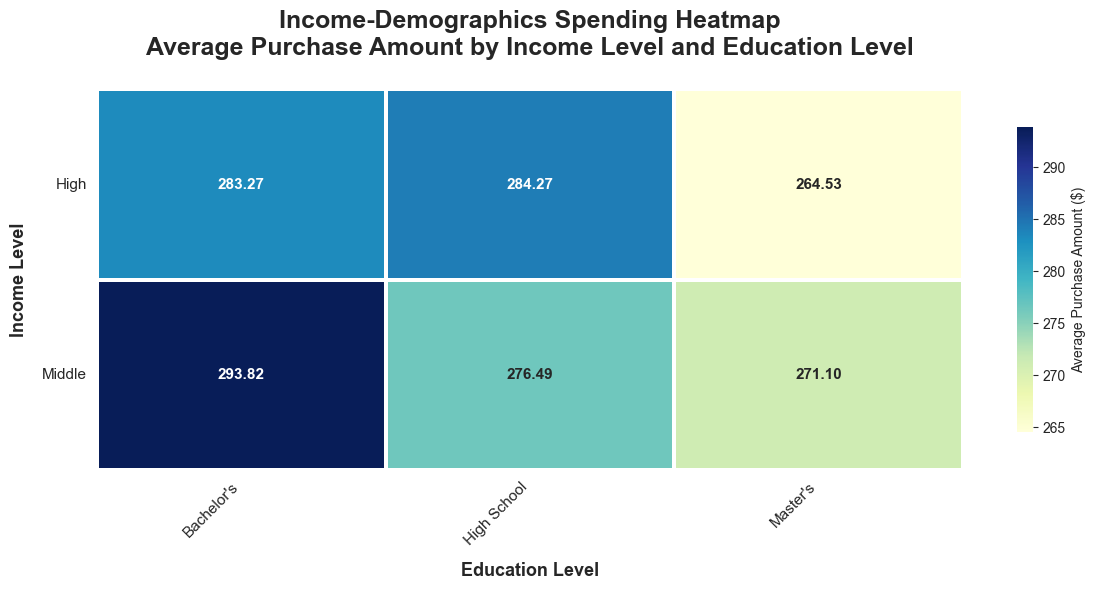


=== Key Insights ===

Overall average purchase amount: $278.91

--- By Income Level ---
High: $277.35
Middle: $280.47

--- By Education Level ---
Bachelor's: $288.54
High School: $280.38
Master's: $267.81

Highest spending combination:
  Middle income × Bachelor's: $293.82

Lowest spending combination:
  High income × Master's: $264.53


In [87]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12, 6))

# Create the heatmap
sns.heatmap(
    income_education_pivot,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    cbar_kws={'label': 'Average Purchase Amount ($)', 'shrink': 0.8},
    linewidths=1.5,
    linecolor='white',
    annot_kws={'size': 11, 'weight': 'bold'}
)

plt.title('Income-Demographics Spending Heatmap\nAverage Purchase Amount by Income Level and Education Level', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Education Level', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Income Level', fontsize=13, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Add subtle background
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.savefig('viz/Fig5-Income and Education Spending.png', dpi=300, bbox_inches='tight')
plt.show()

# Analysis
print("\n=== Key Insights ===")
print(f"\nOverall average purchase amount: ${income_education_pivot.values.mean():.2f}")

print("\n--- By Income Level ---")
for income in income_education_pivot.index:
    avg = income_education_pivot.loc[income].mean()
    print(f"{income}: ${avg:.2f}")

print("\n--- By Education Level ---")
for education in income_education_pivot.columns:
    avg = income_education_pivot[education].mean()
    print(f"{education}: ${avg:.2f}")

# Find highest and lowest combinations
max_idx = np.unravel_index(income_education_pivot.values.argmax(), income_education_pivot.shape)
min_idx = np.unravel_index(income_education_pivot.values.argmin(), income_education_pivot.shape)

print(f"\nHighest spending combination:")
print(f"  {income_education_pivot.index[max_idx[0]]} income × {income_education_pivot.columns[max_idx[1]]}: ${income_education_pivot.values[max_idx]:.2f}")

print(f"\nLowest spending combination:")
print(f"  {income_education_pivot.index[min_idx[0]]} income × {income_education_pivot.columns[min_idx[1]]}: ${income_education_pivot.values[min_idx]:.2f}")

# Figure 6: High-Value Customer Profile

**Business Question**: "What distinguishes high-value customers from low-value customers beyond just spending?"

In [88]:
# Identify top 25% and bottom 25% spenders
purchase_q75 = df['Purchase_Amount_Clean'].quantile(0.75)
purchase_q25 = df['Purchase_Amount_Clean'].quantile(0.25)

print(f"Top 25% threshold: ${purchase_q75:.2f}")
print(f"Bottom 25% threshold: ${purchase_q25:.2f}")

# Segment customers
top_spenders = df[df['Purchase_Amount_Clean'] >= purchase_q75]
bottom_spenders = df[df['Purchase_Amount_Clean'] <= purchase_q25]

print(f"\nTop spenders: {len(top_spenders)} customers")
print(f"Bottom spenders: {len(bottom_spenders)} customers")

# Calculate average metrics for each group
metrics = ['Purchase_Amount_Clean', 'Frequency_of_Purchase', 'Brand_Loyalty', 
           'Customer_Satisfaction', 'Product_Rating', 'Return_Rate']

print("\n=== Top 25% Spenders ===")
for metric in metrics:
    print(f"{metric}: {top_spenders[metric].mean():.2f}")

print("\n=== Bottom 25% Spenders ===")
for metric in metrics:
    print(f"{metric}: {bottom_spenders[metric].mean():.2f}")

Top 25% threshold: $393.48
Bottom 25% threshold: $164.27

Top spenders: 189 customers
Bottom spenders: 189 customers

=== Top 25% Spenders ===
Purchase_Amount_Clean: 449.41
Frequency_of_Purchase: 7.13
Brand_Loyalty: 2.80
Customer_Satisfaction: 5.11
Product_Rating: 3.07
Return_Rate: 0.92

=== Bottom 25% Spenders ===
Purchase_Amount_Clean: 107.41
Frequency_of_Purchase: 7.20
Brand_Loyalty: 3.02
Customer_Satisfaction: 5.15
Product_Rating: 3.06
Return_Rate: 0.98


In [89]:
# Prepare data for radar chart
# Define metrics and their labels - use shorter labels to avoid collision
categories = ['Purchase\nAmount', 'Frequency', 'Brand\nLoyalty', 
              'Satisfaction', 'Rating', 'Low Return\nRate']

# Calculate normalized values for top spenders
top_values = [
    top_spenders['Purchase_Amount_Clean'].mean() / df['Purchase_Amount_Clean'].max(),
    top_spenders['Frequency_of_Purchase'].mean() / df['Frequency_of_Purchase'].max(),
    top_spenders['Brand_Loyalty'].mean() / 5.0,  # Scale to 0-1 (max is 5)
    top_spenders['Customer_Satisfaction'].mean() / 10.0,  # Scale to 0-1 (max is 10)
    top_spenders['Product_Rating'].mean() / 5.0,  # Scale to 0-1 (max is 5)
    1 - (top_spenders['Return_Rate'].mean() / 100.0)  # Inverted and normalized
]

# Calculate normalized values for bottom spenders
bottom_values = [
    bottom_spenders['Purchase_Amount_Clean'].mean() / df['Purchase_Amount_Clean'].max(),
    bottom_spenders['Frequency_of_Purchase'].mean() / df['Frequency_of_Purchase'].max(),
    bottom_spenders['Brand_Loyalty'].mean() / 5.0,
    bottom_spenders['Customer_Satisfaction'].mean() / 10.0,
    bottom_spenders['Product_Rating'].mean() / 5.0,
    1 - (bottom_spenders['Return_Rate'].mean() / 100.0)
]

print("Top Spenders (normalized):", [f"{v:.3f}" for v in top_values])
print("Bottom Spenders (normalized):", [f"{v:.3f}" for v in bottom_values])

Top Spenders (normalized): ['0.902', '0.594', '0.561', '0.511', '0.615', '0.991']
Bottom Spenders (normalized): ['0.216', '0.600', '0.604', '0.515', '0.612', '0.990']


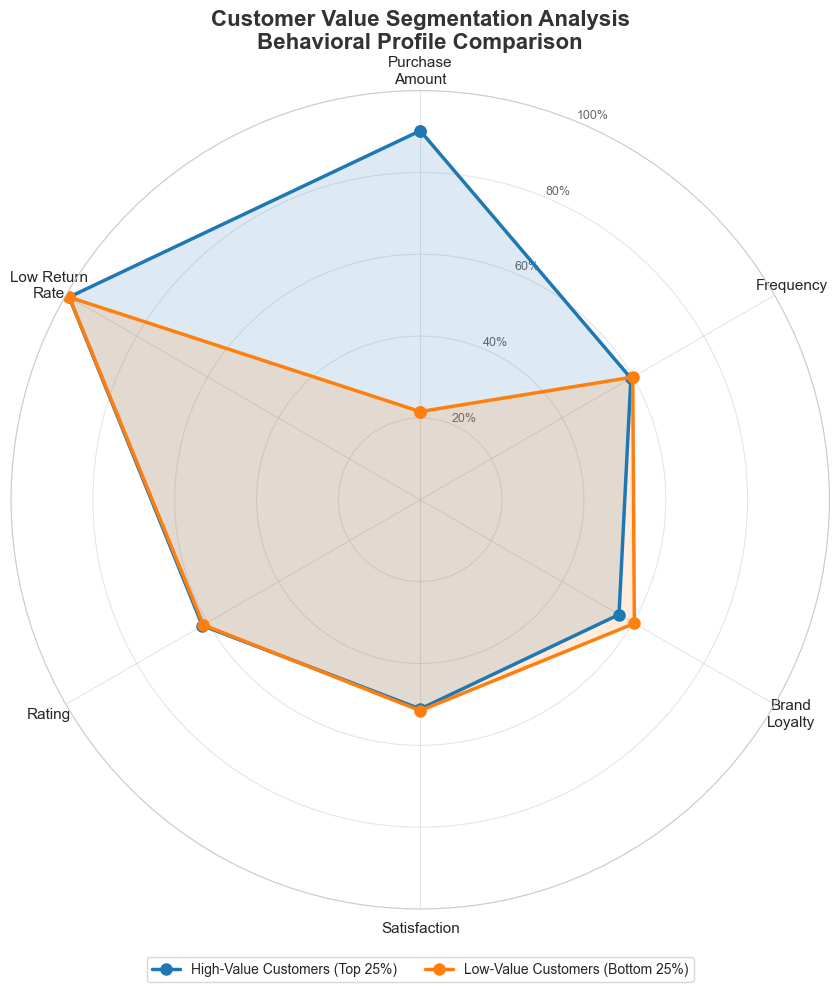


=== Customer Profile Comparison ===

Metric                    | Top 25% | Bottom 25% | Difference
-----------------------------------------------------------------
Purchase Amount           |   0.902 |      0.216 |     +0.686
Purchase Frequency        |   0.594 |      0.600 |     -0.005
Brand Loyalty             |   0.561 |      0.604 |     -0.043
Customer Satisfaction     |   0.511 |      0.515 |     -0.004
Product Rating            |   0.615 |      0.612 |     +0.003
Return Rate (Inverted)    |   0.991 |      0.990 |     +0.001

=== Key Insights ===

Largest difference: Purchase Amount (+0.686)
Smallest difference: Brand Loyalty (-0.043)

=== Business Recommendations ===
Based on the profile differences:
- High-value customers show distinct behavioral patterns beyond spending
- Target acquisition should focus on customers with similar characteristics
- Retention strategies should emphasize the differentiating factors


In [90]:
# Create professional radar chart using matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Create figure with white background
fig = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig.add_subplot(111, projection='polar', facecolor='white')

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * math.pi for n in range(num_vars)]
angles += angles[:1]

# Close the plot
top_values_plot = top_values + top_values[:1]
bottom_values_plot = bottom_values + bottom_values[:1]

# Plot data
ax.plot(angles, top_values_plot, 'o-', linewidth=2.5, 
        color='#1f77b4', label='High-Value Customers (Top 25%)', markersize=8, markerfacecolor='#1f77b4')
ax.fill(angles, top_values_plot, alpha=0.15, color='#1f77b4')

ax.plot(angles, bottom_values_plot, 'o-', linewidth=2.5, 
        color='#ff7f0e', label='Low-Value Customers (Bottom 25%)', markersize=8, markerfacecolor='#ff7f0e')
ax.fill(angles, bottom_values_plot, alpha=0.15, color='#ff7f0e')

# Fix axis direction
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)

# Draw category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11)

# Configure radial axis
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], size=9, color='#666666')

# Style the grid
ax.grid(True, linestyle='-', linewidth=0.8, color='#CCCCCC', alpha=0.5)
ax.spines['polar'].set_color('#CCCCCC')
ax.spines['polar'].set_linewidth(0.8)

# Add title
plt.title('Customer Value Segmentation Analysis\nBehavioral Profile Comparison', 
          size=16, weight='bold', pad=30, color='#333333')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), 
          ncol=2, frameon=True, shadow=False, 
          fontsize=10, edgecolor='#CCCCCC', fancybox=True)

plt.tight_layout()
plt.savefig('viz/Fig6-Customer Value Segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed comparison
print("\n=== Customer Profile Comparison ===")
print("\nMetric                    | Top 25% | Bottom 25% | Difference")
print("-" * 65)

metric_names = ['Purchase Amount', 'Purchase Frequency', 'Brand Loyalty', 
                'Customer Satisfaction', 'Product Rating', 'Return Rate (Inverted)']

for i, metric in enumerate(metric_names):
    top_val = top_values[i]
    bottom_val = bottom_values[i]
    diff = top_val - bottom_val
    print(f"{metric:25} | {top_val:7.3f} | {bottom_val:10.3f} | {diff:+10.3f}")

print("\n=== Key Insights ===")
# Find biggest differences
differences = [top_values[i] - bottom_values[i] for i in range(len(top_values))]
max_diff_idx = differences.index(max(differences))
min_diff_idx = differences.index(min(differences))

print(f"\nLargest difference: {metric_names[max_diff_idx]} ({differences[max_diff_idx]:+.3f})")
print(f"Smallest difference: {metric_names[min_diff_idx]} ({differences[min_diff_idx]:+.3f})")

print("\n=== Business Recommendations ===")
print("Based on the profile differences:")
print("- High-value customers show distinct behavioral patterns beyond spending")
print("- Target acquisition should focus on customers with similar characteristics")
print("- Retention strategies should emphasize the differentiating factors")